In [2]:
import pandas as pd

In [3]:
df=pd.read_csv(r'D:\Data analysis\My Project\Machine learning algorithms\Logistic Regression iris\Iris.csv')
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [4]:
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()
df['Species_n']=lb.fit_transform(df['Species'])
df.drop(['Id','Species'],axis=1,inplace=True)
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species_n
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

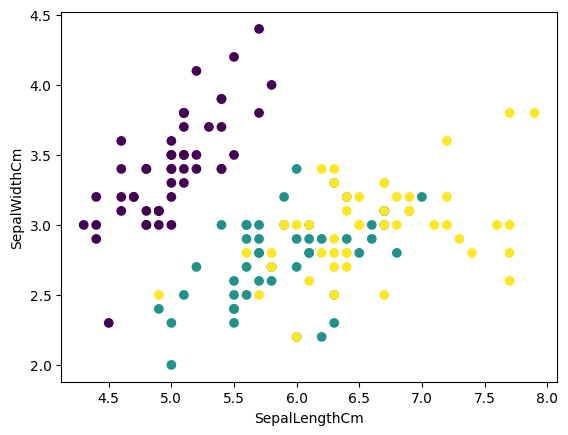

In [6]:
plt.scatter(df['SepalLengthCm'],df['SepalWidthCm'],c=df['Species_n'])
plt.xlabel('SepalLengthCm')
plt.ylabel('SepalWidthCm')
plt.show()

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier 

# LogisticRegression

In [8]:
x=df.drop(['Species_n'],axis=1)
y=df['Species_n']

In [9]:
X_train, X_test, y_train, y_test=train_test_split(x,y,test_size=0.2)

In [10]:
print(X_train.shape)
print(X_test.shape)

(120, 4)
(30, 4)


In [11]:
Lg=LogisticRegression(max_iter=1000)
Lg.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

In [12]:
Lg.predict(X_test)

array([2, 0, 1, 1, 1, 2, 0, 0, 1, 1, 0, 1, 0, 2, 0, 1, 1, 2, 2, 2, 0, 0,
       0, 2, 0, 0, 0, 1, 2, 2])

In [13]:
Lg.score(X_test,y_test)

0.9666666666666667

# Decision Tree

In [14]:
Dt=tree.DecisionTreeClassifier()
Dt.fit(X_train,y_train)
Dt.predict(X_test)

array([2, 0, 1, 1, 1, 2, 0, 0, 1, 1, 0, 1, 0, 2, 0, 1, 1, 2, 2, 2, 0, 0,
       0, 2, 0, 0, 0, 1, 2, 2])

In [15]:
Dt.score(X_test,y_test)

0.9666666666666667

#  Random Forest

In [16]:
Rd=RandomForestClassifier()
Rd.fit(X_train,y_train)
Rd.predict(X_test)

array([2, 0, 1, 1, 1, 2, 0, 0, 1, 1, 0, 1, 0, 2, 0, 1, 1, 2, 2, 2, 0, 0,
       0, 2, 0, 0, 0, 1, 2, 2])

In [17]:
Rd.score(X_test,y_test)

0.9666666666666667

# SVM

In [18]:
from sklearn.svm import SVC

In [19]:
SV_rbf=SVC(kernel='rbf')
SV_rbf.fit(X_train,y_train)
SV_rbf.predict(X_test)

array([2, 0, 1, 1, 1, 2, 0, 0, 1, 1, 0, 1, 0, 2, 0, 1, 1, 2, 2, 2, 0, 0,
       0, 2, 0, 0, 0, 1, 2, 2])

In [20]:
SV_rbf.score(X_test,y_test)

0.9666666666666667

In [21]:
Sv_liner=SVC(kernel='linear')
Sv_liner.fit(X_train,y_train)
Sv_liner.predict(X_test)

array([2, 0, 1, 1, 1, 2, 0, 0, 1, 1, 0, 1, 0, 2, 0, 1, 1, 2, 2, 2, 0, 0,
       0, 2, 0, 0, 0, 1, 2, 2])

In [22]:
Sv_liner.score(X_test,y_test)

0.9666666666666667

In [23]:
from sklearn.model_selection import cross_val_score

In [24]:
cross_val_score(LogisticRegression(max_iter=1000),x,y)

array([0.96666667, 1.        , 0.93333333, 0.96666667, 1.        ])

In [25]:
# best one

cross_val_score(SVC(kernel='linear'),x,y)

array([0.96666667, 1.        , 0.96666667, 0.96666667, 1.        ])

In [26]:
cross_val_score(SVC(kernel='rbf'),x,y)

array([0.96666667, 0.96666667, 0.96666667, 0.93333333, 1.        ])

In [27]:
cross_val_score(RandomForestClassifier(),x,y)

array([0.96666667, 0.96666667, 0.93333333, 0.96666667, 1.        ])

In [28]:
cross_val_score(tree.DecisionTreeClassifier(),x,y)

array([0.96666667, 0.96666667, 0.9       , 0.96666667, 1.        ])